In [1]:
import numpy as np
from os.path import abspath, expanduser
from ECOv002_CMR import ECOSTRESS_CMR_search, download_file, GranuleID, download_ECOSTRESS_granule
from verma_net_radiation import verma_net_radiation

In [2]:
import logging

logging.getLogger().handlers = []

In [3]:
aquisition_date = "2024-10-22"
orbit = 35698
scene = 14
tile = "11SPS"

In [4]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=orbit,
    scene=scene,
    tile=tile, 
    aquisition_date=aquisition_date
)

L2T_LSTE_granule

L2TLSTE("/Users/gregoryhalverson/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01")

In [5]:
time_UTC = L2T_LSTE_granule.time_UTC
print(time_UTC.strftime("%Y-%m-%d %H:%M:%S"))

2024-10-22 18:36:27


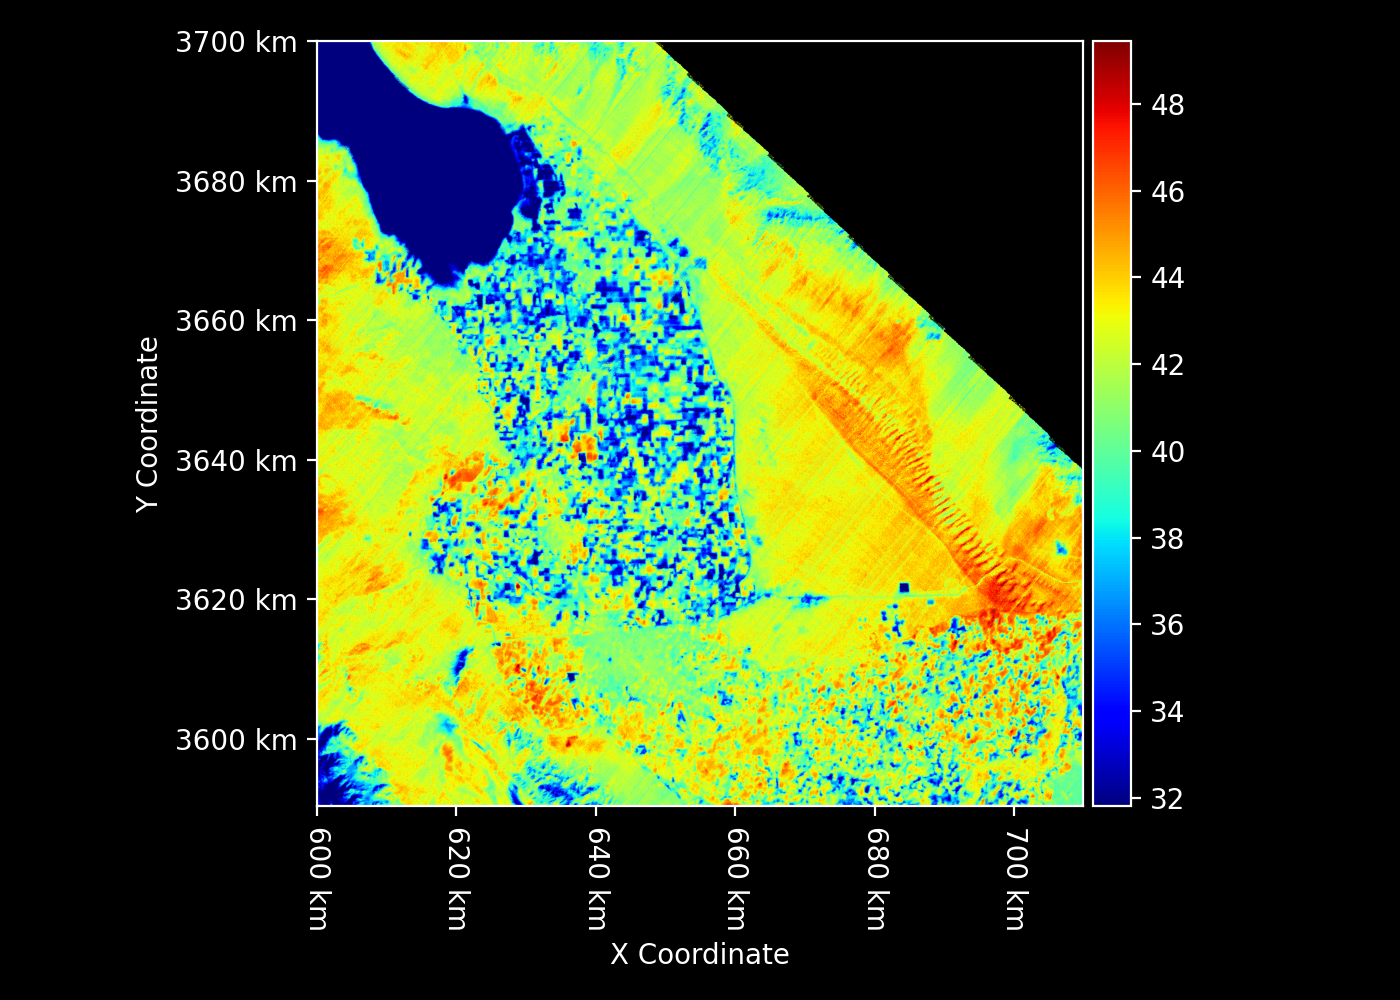

In [6]:
ST_C = L2T_LSTE_granule.ST_C
ST_C

In [7]:
geometry = ST_C.geometry
geometry

{
  "dimensions": {
    "rows": 1568,
    "cols": 1568
  },
  "bbox": {
    "xmin": 600000.0,
    "ymin": 3590260.0,
    "xmax": 709760.0,
    "ymax": 3700020.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

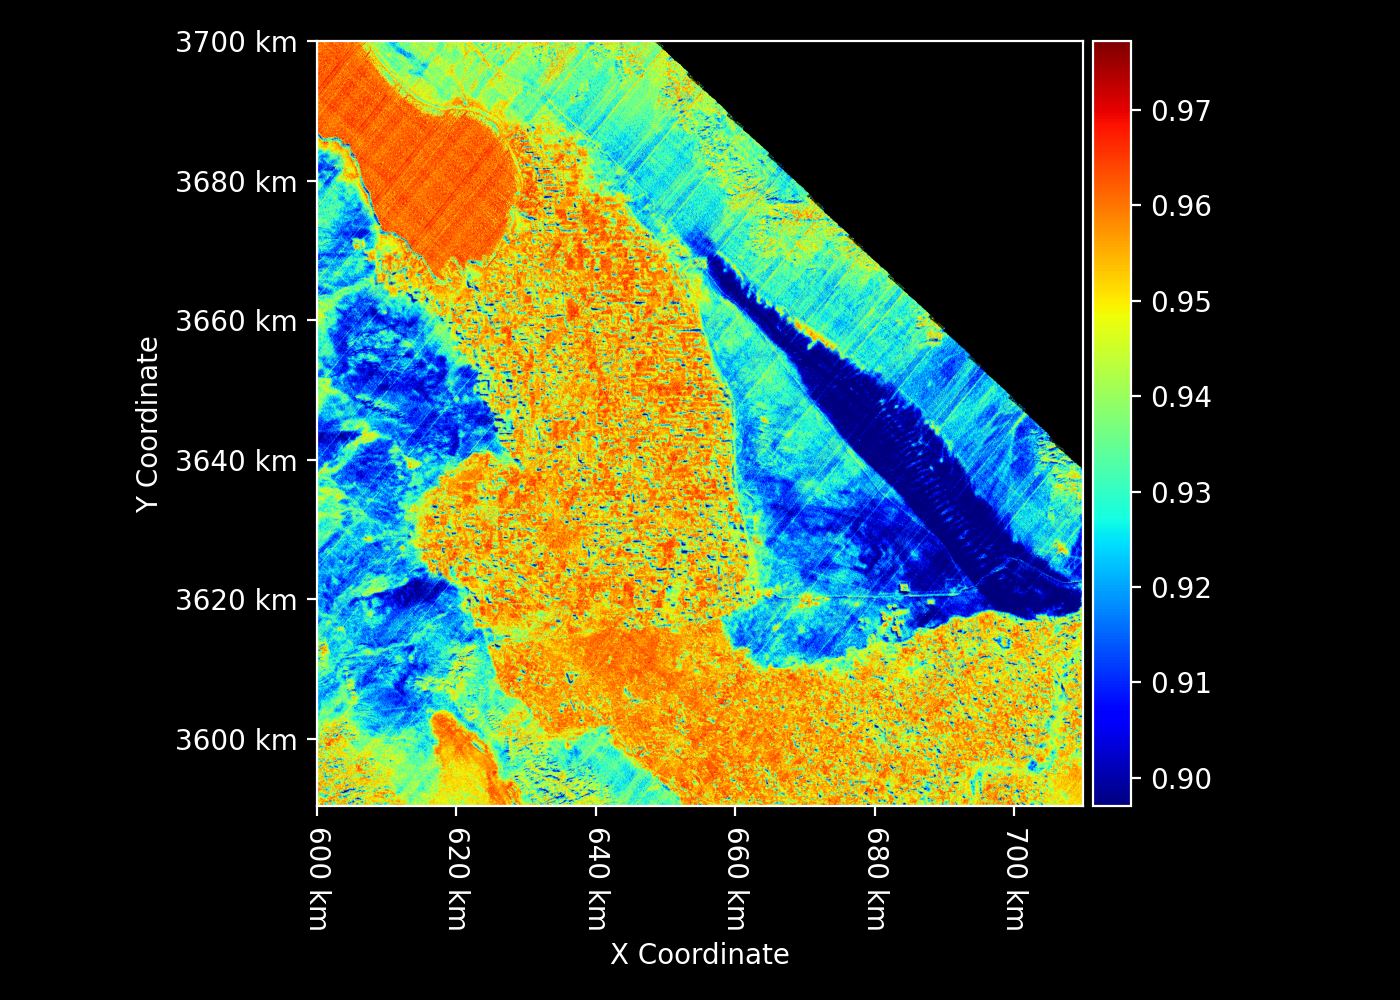

In [8]:
emissivity = L2T_LSTE_granule.emissivity
emissivity

In [9]:
L2T_STARS_granule = download_ECOSTRESS_granule(
    product="L2T_STARS", 
    tile=tile, 
    aquisition_date=aquisition_date
)

L2T_STARS_granule

L2TSTARS("/Users/gregoryhalverson/data/ECOSTRESS/ECOv002_L2T_STARS_11SPS_20241022_0713_01")

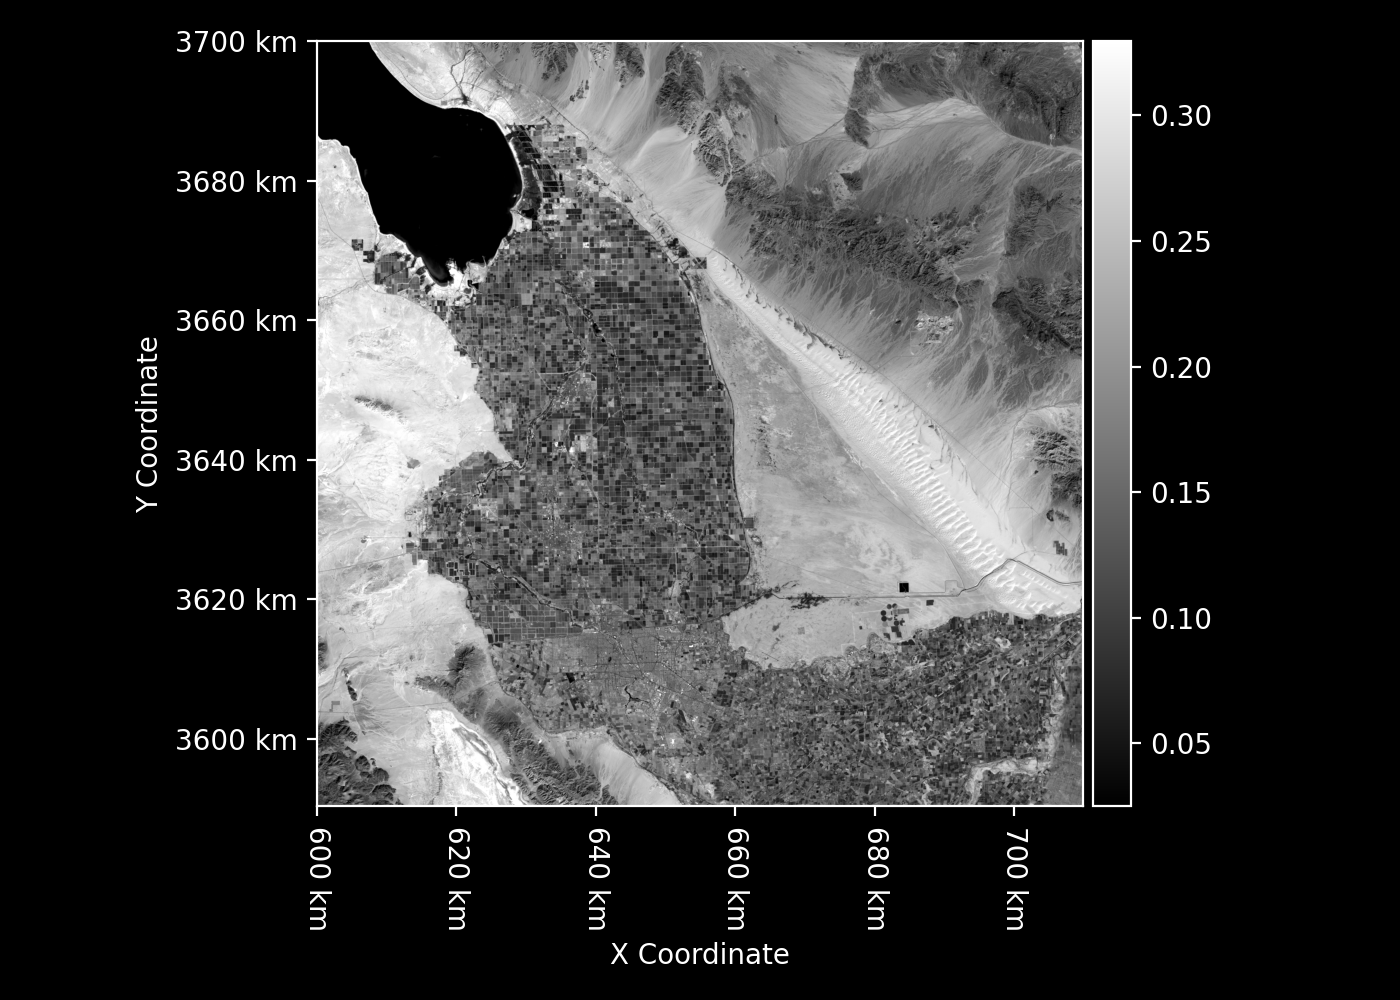

In [10]:
albedo = L2T_STARS_granule.albedo
albedo

In [11]:
L3T_MET_granule = download_ECOSTRESS_granule(
    product="L3T_MET", 
    orbit=orbit,
    scene=scene,
    tile=tile, 
    aquisition_date=aquisition_date
)

L3T_MET_granule

L3TMET("/Users/gregoryhalverson/data/ECOSTRESS/ECOv002_L3T_MET_35698_014_11SPS_20241022T183627_0713_01")

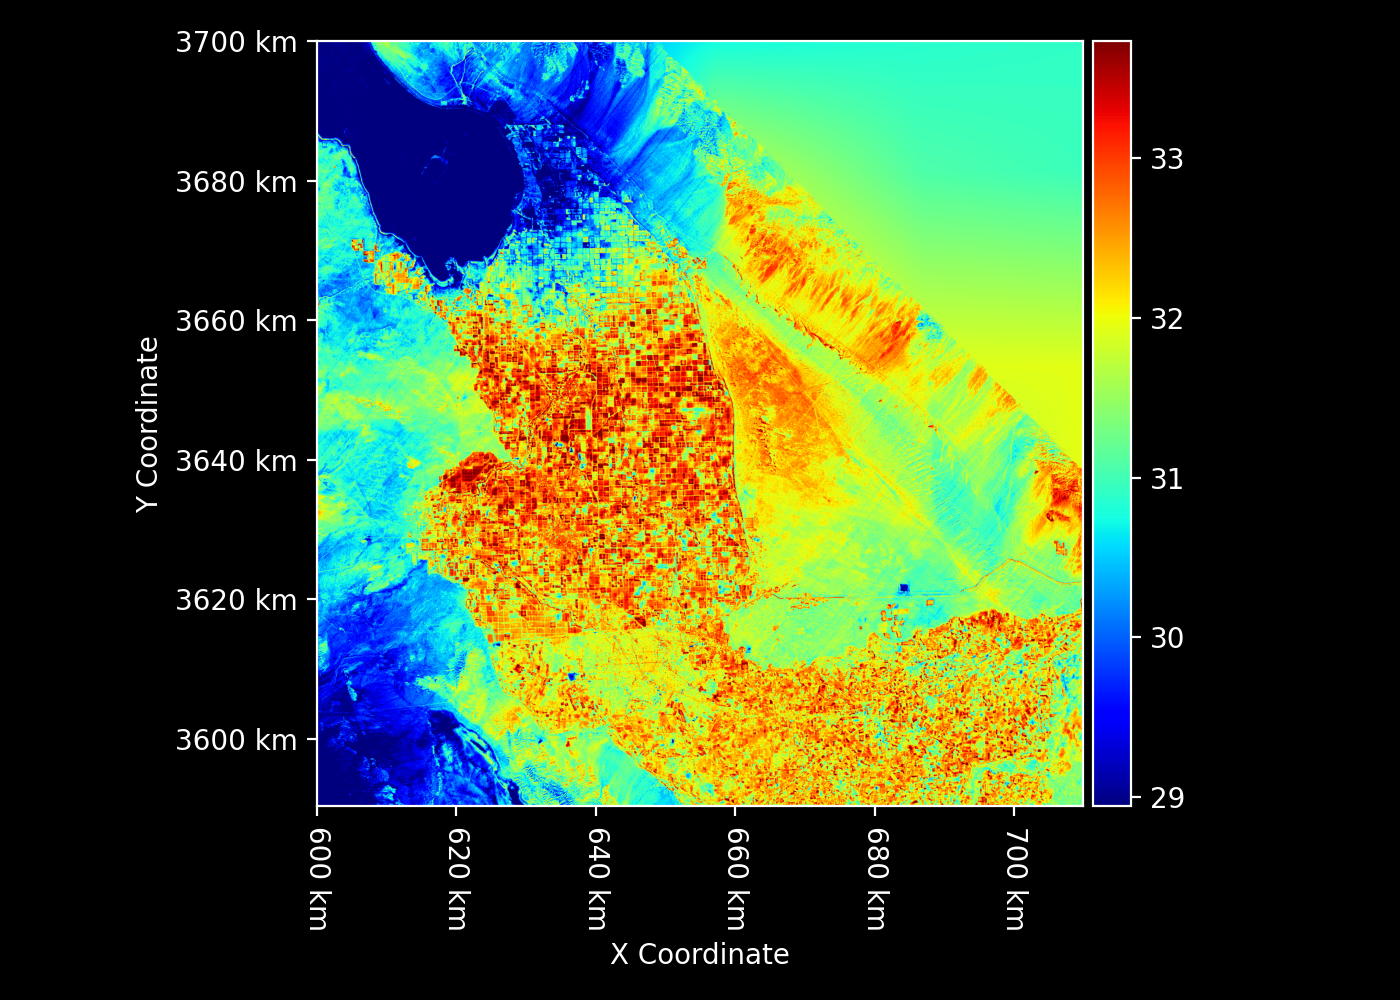

In [12]:
Ta_C = L3T_MET_granule.variable("Ta")
Ta_C

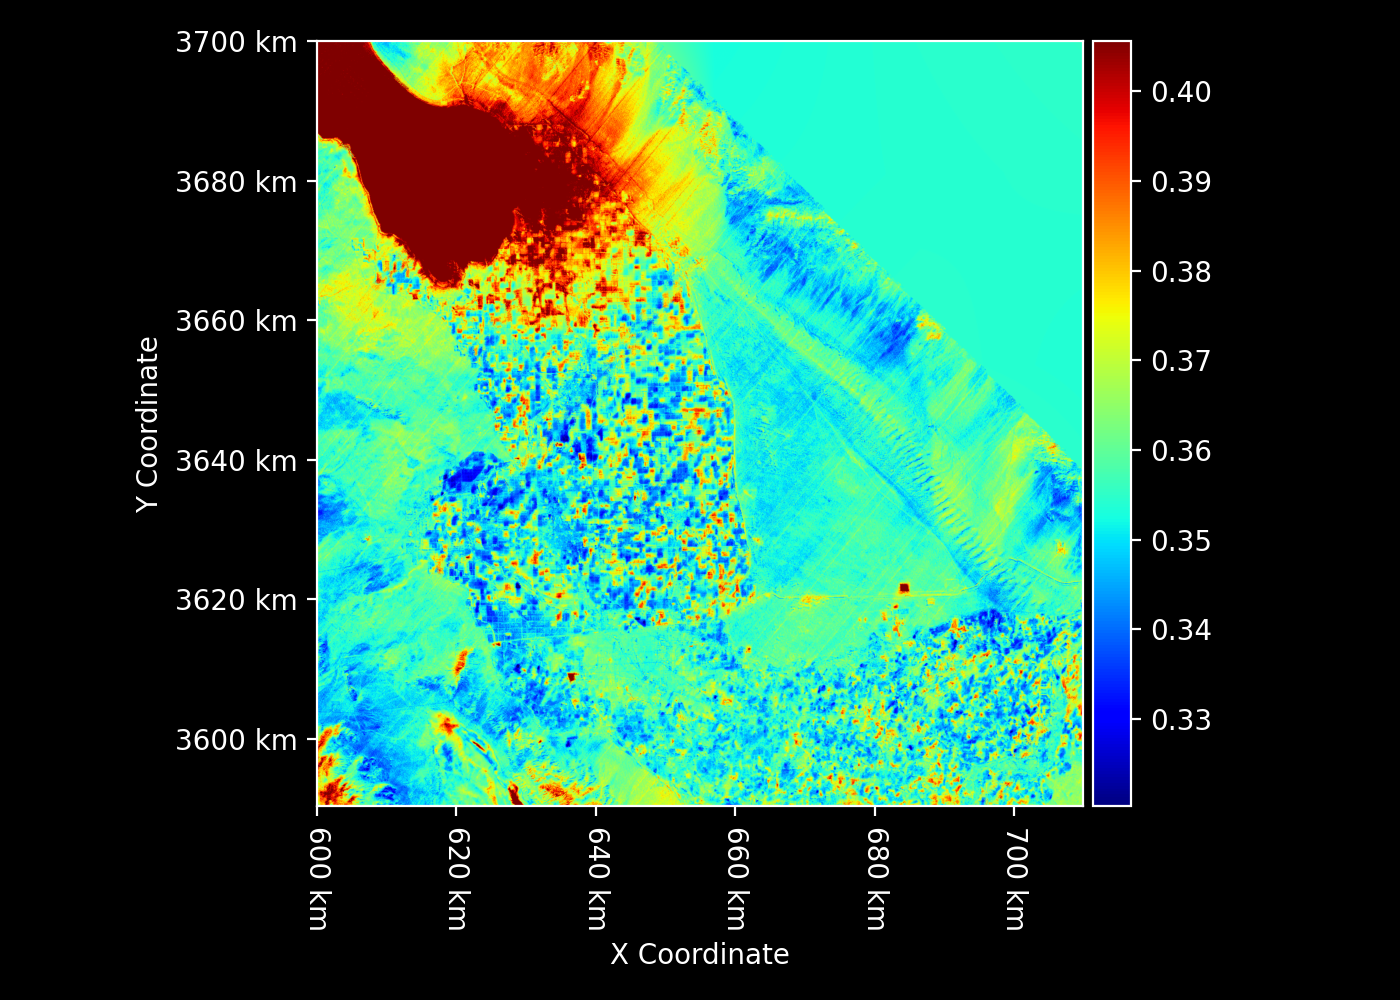

In [13]:
RH = L3T_MET_granule.variable("RH")
RH

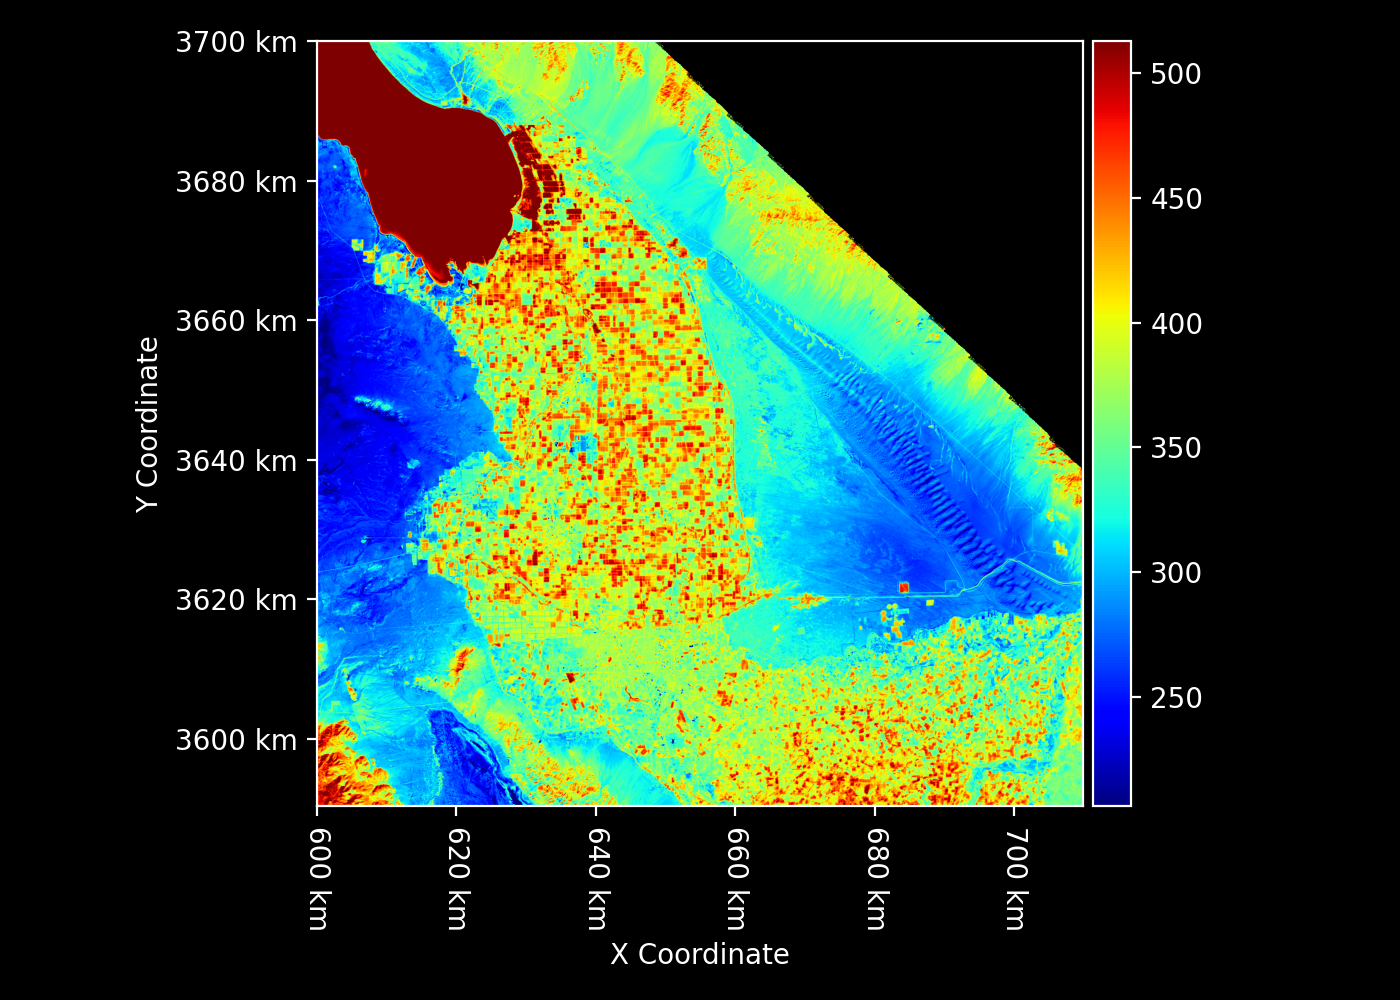

In [14]:
results = verma_net_radiation(
    ST_C=ST_C,
    emissivity=emissivity,
    albedo=albedo,
    Ta_C=Ta_C,
    RH=RH,
    geometry=geometry,
    time_UTC=time_UTC
)

results["Rn"]